In [204]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand
from sklearn import preprocessing 

In [205]:
np.random.seed(26)
df = pd.read_csv('Preprocessed_Data_2019_2020.csv')

feature_names = df.columns
for i in range(len(feature_names)):
 print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 FULL NAME 			 <class 'str'>
1 	 TEAM 			 <class 'str'>
2 	 WingSpan(cm) 			 <class 'numpy.float64'>
3 	 Height(cm) 			 <class 'numpy.float64'>
4 	 POS 			 <class 'str'>
5 	 AGE 			 <class 'numpy.float64'>
6 	 GP 			 <class 'numpy.int64'>
7 	 MPG 			 <class 'numpy.float64'>
8 	 MIN%Minutes Percentage 			 <class 'numpy.float64'>
9 	 USG%Usage Rate 			 <class 'numpy.float64'>
10 	 TO%Turnover Rate 			 <class 'numpy.float64'>
11 	 FTA 			 <class 'numpy.int64'>
12 	 FT 			 <class 'numpy.float64'>
13 	 FT% 			 <class 'numpy.float64'>
14 	 2PA 			 <class 'numpy.int64'>
15 	 2P 			 <class 'numpy.float64'>
16 	 2P% 			 <class 'numpy.float64'>
17 	 3PA 			 <class 'numpy.int64'>
18 	 3P 			 <class 'numpy.float64'>
19 	 3P% 			 <class 'numpy.float64'>
20 	 eFG 			 <class 'numpy.float64'>
21 	 eFG%Effective Shooting Percentage 			 <class 'numpy.float64'>
22 	 TS 			 <class 'numpy.float64'>
23 	 TS%True Shooting Percentage 			 <class 'numpy.float64'>
24 	 PPGPoints per game. 			 <class 'numpy.fl

In [206]:
df.columns

Index(['FULL NAME', 'TEAM', 'WingSpan(cm)', 'Height(cm)', 'POS', 'AGE', 'GP',
       'MPG', 'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate',
       'FTA', 'FT', 'FT%', '2PA', '2P', '2P%', '3PA', '3P', '3P%', 'eFG',
       'eFG%Effective Shooting Percentage', 'TS',
       'TS%True Shooting Percentage', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG'],
      dtype='object')

In [207]:
columns_to_norm = ['GP', 'MPG',
       'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA',
       'FT','2PA', '2P', '3PA', '3P', 'eFG', 'TS', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG','WingSpan(cm)','Height(cm)']

In [208]:
scaler = preprocessing.StandardScaler().fit(df[columns_to_norm])

In [209]:
N_Data = scaler.transform(df[columns_to_norm])

In [210]:
print(N_Data)

[[ 0.85115598 -0.84231793 -0.84252998 ... -1.03086564  0.3822731
   0.44939109]
 [-1.37043111 -1.87372764 -1.87436818 ...         nan -0.80191663
  -1.89125881]
 [ 0.72773448  0.85136538  0.84593255 ...  0.42457052  1.09219037
   1.32713479]
 ...
 [ 0.35746996  0.60165566  0.59578995 ... -0.92305555  0.05043152
   1.32713479]
 [-0.30077807 -0.46232488 -0.45689347 ... -1.3542959   0.99748502
   1.61971603]
 [-0.58876158  0.02623762  0.02775781 ... -1.13867572  0.99748502
   1.61971603]]


In [211]:
N_Data.astype

<function ndarray.astype>

In [212]:
df1 = pd.DataFrame(N_Data, columns = ['GP', 'MPG',
       'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA',
       'FT','2PA', '2P', '3PA', '3P', 'eFG', 'TS', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG','WingSpan(cm)','Height(cm)'])

In [213]:
df1['3P']

0      -1.968401
1      -1.968401
2      -1.968401
3      -0.311967
4       0.416863
          ...   
1159   -0.053564
1160    0.191588
1161    0.681893
1162    0.237969
1163   -0.073441
Name: 3P, Length: 1164, dtype: float64

In [214]:
df1['Name']=df['FULL NAME']

In [215]:
df1['POS']=df['POS']

In [216]:
df1

,GP,MPG,MIN%Minutes Percentage,USG%Usage Rate,TO%Turnover Rate,FTA,FT,2PA,2P,3PA,...,SPGSteals per game.,BPGBlocks per game.,TOPGTurnovers per game.,VI,ORTG,DRTG,WingSpan(cm),Height(cm),Name,POS
0,0.851156,-0.842318,-0.842530,0.151856,0.187677,0.215284,-0.893769,0.103420,0.368409,-0.868174,...,-0.680879,0.167144,-0.447443,-0.073482,-0.133914,-1.030866,0.382273,0.449391,Precious Achiuwa,F
1,-1.370431,-1.873728,-1.874368,-0.021354,-1.880743,-0.800672,-3.186275,-0.873457,-2.293285,-0.861111,...,-1.483418,-0.976568,-1.323449,-0.724848,NaN,NaN,-0.801917,-1.891259,Jaylen Adams,G
2,0.727734,0.851365,0.845933,-1.199177,0.831185,0.446182,-1.186525,0.448201,0.888106,-0.854047,...,0.778282,0.664410,0.378506,0.170781,0.743260,0.424571,1.092190,1.327135,Steven Adams,C
3,0.974577,1.481068,1.476500,0.879335,0.417501,2.468857,0.412374,2.600867,0.558028,-0.818730,...,1.361947,1.584352,1.980346,1.921329,0.879256,-0.078543,0.761094,0.741972,Bam Adebayo,C-F
4,-0.794464,0.655940,0.658326,0.706126,-0.808229,-0.458941,0.588027,-0.135274,0.108560,-0.345475,...,-0.559283,1.161676,-0.134583,0.170781,-0.099915,0.819874,1.139916,1.327135,LaMarcus Aldridge,C-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1.673966,1.177074,1.179456,-0.107958,-0.042148,0.446182,-0.628037,0.028276,-0.221518,-0.288967,...,1.653779,0.092554,1.892745,0.659306,0.328472,-0.689467,0.145137,0.449391,Thaddeus Young,F
1160,1.673966,1.198788,1.200301,1.693419,0.815863,3.023015,0.227712,0.669214,-0.277702,0.078336,...,-0.218812,-0.479302,0.040618,0.374333,-0.086315,1.574545,-1.464854,-1.598678,Trae Young,G
1161,0.357470,0.601656,0.595790,-0.419735,0.111069,0.501598,0.565508,-0.780632,-0.607780,-0.804603,...,-1.288863,0.067691,-0.597615,0.618596,1.015253,-0.923056,0.050432,1.327135,Cody Zeller,F-C
1162,-0.300778,-0.462325,-0.456893,0.325065,0.095747,-0.191099,1.317666,-0.882298,-1.710381,-0.811666,...,-0.680879,-0.156079,-0.284756,-0.602717,0.811258,-1.354296,0.997485,1.619716,Ivica Zubac,C


In [217]:
df1 = df1.dropna()
df1 = df1[~df['3P'].isna()] 
df1 = df1.sample(frac = 1) 
train_proportion = 0.6
test_proportion = 0.2
n = len(df1)
print('Size of dataset: ', str(n))

t = int(train_proportion * n)
t1 = int(test_proportion*n)
target = df1['3P']
target_columns = ['3PA','3P']
data = df1.loc[:, ~df1.columns.isin(target_columns)]
# the following variable records the features of examples in the training set
train_x = data.iloc[:t]
# the following variable records the features of examples in the test set
test_x = data.iloc[t+t1:]
# the following variable records the labels of examples in the training set
train_y = target[:t]
# the following variable records the labels of examples in the test set
test_y = target[t+t1:]

valid_x = data.iloc[t:t+t1]
valid_y = target[t:t+t1]

print('Training dataset: ', train_x)


Size of dataset:  1004
Training dataset:              GP       MPG  MIN%Minutes Percentage  USG%Usage Rate  \
115  -1.576134 -1.461164               -1.462675       -2.636815   
148  -1.000167 -0.929173               -0.925911       -0.090637   
852  -0.671043 -0.028047               -0.024355       -0.177242   
194  -0.012795 -0.972601               -0.967601       -0.229205   
163   1.303701  1.329071                1.335795        1.450926   
...        ...       ...                     ...             ...   
105  -0.753324  0.721082                0.726073        0.151856   
761   1.632826  0.786224                0.783397        0.082572   
1113  0.645453  0.265090                0.267478        0.221140   
220  -0.383059 -1.330880               -1.332393        0.186498   
874   1.303701  0.655940                0.653114        0.065251   

      TO%Turnover Rate       FTA        FT       2PA        2P       eFG  ...  \
115          -1.880743 -0.800672 -3.186275 -0.895558 -3.4661

<ipython-input-217-4a382b2467f8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[~df['3P'].isna()]


In [218]:
def string_to_float(string):
     try:
        return float(string)
     except:
        return 0.0
    
labels_real = [
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',
 'PPGPoints per game.',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.'
]

#labels_string = [
    #'POS',
    
#]



In [219]:
train_vals_real = np.asarray(train_x[labels_real])

valid_vals_real = np.asarray(valid_x[labels_real])

In [220]:
#assert(train_vals_from_string.applymap(lambda x:type(x)!=str).all(skipna=False).all(skipna=False) == True)
#assert(test_vals_from_string.applymap(lambda x:type(x)!=str).all(skipna=False).all(skipna=False) == True)

In [221]:
#train_vals_from_string = np.asarray(train_vals_from_string)
#test_vals_from_string = np.asarray(test_vals_from_string)

In [222]:
train_vals = np.concatenate((train_vals_real,np.ones((len(train_vals_real[:,0]),1))), axis = 1)

valid_vals = np.concatenate((valid_vals_real,np.ones((len(valid_vals_real[:,0]),1))), axis = 1)


In [223]:
def MSE(y, pred):
    return np.mean(np.power(np.subtract(y,pred),2)) 

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

In [224]:
# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred,w

In [225]:
train_MSE, valid_MSE, valid_pred,w = run_OLS(train_y, valid_y, train_vals, valid_vals)

Train MSE	 0.6805097610395883
Validate MSE	 0.6742426233528992


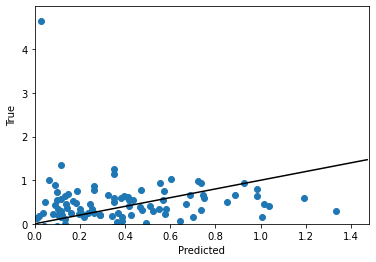

In [227]:
print("Train MSE\t", str(train_MSE))
print("Validate MSE\t", str(valid_MSE))

plot_pred_true(valid_pred.flatten(), valid_y) #.flatten() will make sure the dimensions match

In [228]:
cat_labels = [
  'POS'
]

#Sets of all categories in a particular column
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [229]:
def onehot(column=None, col=None):
    column = column.astype(pd.CategoricalDtype(categories = col))
    hot_encode = pd.get_dummies(column)
    
    return np.asarray(hot_encode)

In [230]:
trv = np.zeros((len(train_x),1))
for i in range(len(cat_labels)):
    trv = np.concatenate((trv,onehot(train_x[cat_labels[i]],cats_sets[i])),axis = 1)
     
train_cat_vals = trv[:,1:]

vv = np.zeros((len(valid_x),1))
for i in range(len(cat_labels)):
    vv = np.concatenate((vv,onehot(valid_x[cat_labels[i]],cats_sets[i])),axis = 1)
    
valid_cat_vals = vv[:,1:]

In [231]:
train_vals1 = np.concatenate((train_vals,train_cat_vals),axis = 1)
valid_vals1 = np.concatenate((valid_vals,valid_cat_vals),axis = 1)

In [238]:
train_ridge = np.concatenate((train_vals_real,train_cat_vals),axis = 1)

In [239]:
valid_ridge = np.concatenate((valid_vals_real,valid_cat_vals),axis = 1)

In [234]:
train_MSE, valid_MSE, valid_pred,w = run_OLS(train_y, valid_y, train_vals1, valid_vals1)

Train MSE	 0.6716298419165714
Validation MSE	 0.6862719538599703


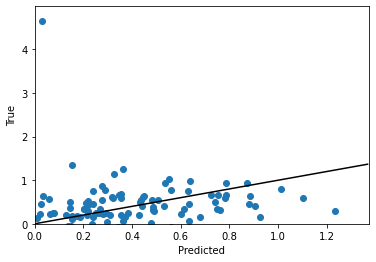

In [235]:
print("Train MSE\t", str(train_MSE))
print("Validation MSE\t", str(valid_MSE))

plot_pred_true(valid_pred.flatten(), valid_y)

In [240]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
alpha = .1 # regularization parameter

lin = Ridge(alpha=alpha).fit(train_ridge,train_y)
yhat = lin.predict(valid_ridge)


Validation MSE is: 0.6861535531789013


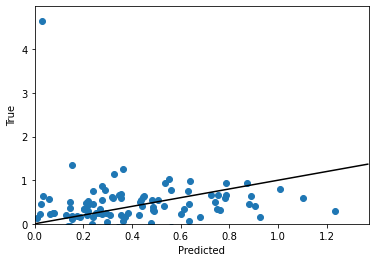

In [241]:
Ridge_MSE = MSE(valid_y, yhat)
print('Validation MSE is: {}'.format(Ridge_MSE))
plot_pred_true(yhat,valid_y)

In [119]:
x1 = df['Height(cm)']

In [120]:
y1 = df['3P']

In [121]:
from scipy.linalg import qr, solve
x = x1

n = 357
max_order = 5
X = np.zeros((n, max_order+1))
y = y1

# method 1: use the default Vandermonde function from numpy
X = np.vander(x, max_order+1, increasing = True)

# method 2: use a for loop
# for k in range(max_order+1):
#     X[:,k] = x**(k)
    
# create a pandas dataframe with data = Vandermonde
col_list = ["order"+str(i) for i in range(max_order+1)]   
df1 = pd.DataFrame(data = X, columns=col_list)
df1


def Vandermonde_df(x, order = max_order):
    X = np.vander(x, order+1, increasing = True)
    col_list = ["order"+str(i) for i in range(order+1)]   
    df = pd.DataFrame(data = X, columns=col_list)
    return df

Q, R = qr(X, mode='economic')
w = solve(R, Q.T @ y)

df1.dot(w)

def p(x, order = max_order, w = w):
    df = Vandermonde_df(x, order)
    y = df.dot(w)
    return np.array(y)

ValueError: array must not contain infs or NaNs

Text(0, 0.5, 'Three Pointers Percentage')

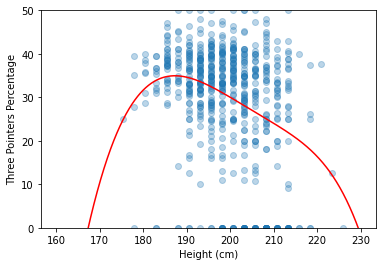

In [201]:
b = np.linspace(160,230,1000)
plt.scatter(x,y,alpha = 0.3)
#plt.ylim(0,50)
plt.plot(b,p(b),color = 'r')
plt.ylim(0,50)
plt.xlabel('Height (cm)')
plt.ylabel('Three Pointers Percentage')

In [187]:
pip install Mosek --user

Note: you may need to restart the kernel to use updated packages.


In [188]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import mosek
import cvxpy as cp

In [189]:
from ControlBurn.ControlBurn import ControlBurnRegressor
from ControlBurn.ControlBurn import ControlBurnClassifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [190]:
df3 = df[columns_to_norm]
df3 = df3.dropna()
df3 = df3[~df['3P'].isna()] 
df3 = df3.sample(frac = 1) 

target = df3['3P']
target_columns = ['3PA','3P']
data1 = df3.loc[:, ~df3.columns.isin(target_columns)]
# the following variable records the features of examples in the training set
train_x = data1.iloc[:]
# the following variable records the features of examples in the test set
# test_x = data1.iloc[t:]
# the following variable records the labels of examples in the training set
train_y = target[:]
# the following variable records the labels of examples in the test set
# test_y = target[t:]
print(train_x)

     GP   MPG  MIN%Minutes Percentage  USG%Usage Rate  TO%Turnover Rate  FTA  \
552  28  13.4                    27.9            15.8              13.2   39   
316  16  11.6                    24.2            16.9              12.5   14   
206  25  29.4                    61.3            23.9              16.5  105   
454  13  19.0                    39.5            13.1               5.3    4   
304  58  22.7                    47.3            12.3               8.5   91   
..   ..   ...                     ...             ...               ...  ...   
377  33   8.2                    17.0            19.1               7.6   25   
94   49  25.6                    53.3            21.4               8.2  118   
409  61  19.7                    41.0            16.5              11.9   50   
183  30  10.1                    21.0            14.3              20.9   19   
364  33   8.2                    17.1            24.6               8.0   38   

        FT  2PA    2P   eFG  ...  TRB%T

<ipython-input-190-293e91ca8c5e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df3[~df['3P'].isna()]


In [191]:
print(train_y)

552    28.3
316    28.1
206    37.5
454    26.5
304    31.6
       ... 
377    35.0
94     41.5
409    31.1
183    19.2
364    12.5
Name: 3P, Length: 595, dtype: float64


In [192]:
X = train_x
y = train_y
y = pd.Series(y)
y.index = X.index
print(str(len(X)) + ' rows')
print(str(len(X.columns)) + ' columns')

595 rows
23 columns


In [193]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)
xTrainScaler = preprocessing.StandardScaler()
xTrain = xTrainScaler.fit_transform(xTrain)
xTrain = pd.DataFrame(xTrain,columns = X.columns)
xTest = preprocessing.StandardScaler().fit_transform(xTest)
xTest = pd.DataFrame(xTest,columns = X.columns)
yTrain = preprocessing.StandardScaler().fit_transform(yTrain.values.reshape(-1, 1))
yTest = preprocessing.StandardScaler().fit_transform(yTest.values.reshape(-1, 1))
yTrain = pd.Series(yTrain.flatten())
yTrain.index = xTrain.index
yTest = pd.Series(yTest.flatten())
yTest.index = xTest.index

In [194]:
# xTrainScaler = preprocessing.StandardScaler()
# xTrain = xTrainScaler.fit_transform(train_ridge)
# xTrain = pd.DataFrame(xTrain,columns = .columns)

In [195]:
cb = ControlBurnRegressor(build_forest_method = 'doublebagboost', alpha = 0.02)
cb.fit(xTrain,yTrain)
# cb.fit(train_vals1,test_vals1)
# print(cb.features_selected_) #print selected features
# print(cb.feature_importances_) #print feature importances

print('Number of trees grown: ' + str(len(cb.forest)))
print('Number of trees selected: ' + str(len(cb.subforest)))
print('Features selected ' + str(cb.features_selected_))

Number of trees grown: 162
Number of trees selected: 40
Features selected ['GP', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA', 'FT', '2PA', '2P', 'eFG', 'TS', 'PPGPoints per game.', 'RPGRebounds per game.', 'TRB%Total Rebound Percentage', 'APGAssists per game.', 'Assist Percentage', 'BPGBlocks per game.', 'ORTG', 'DRTG', 'WingSpan(cm)']


In [228]:
tree_list = cb.subforest
cols = X.columns
print(cols)
# for tree in tree_list:
#     print(cols[tree.feature_importances_ > 0].values )

Index(['GP', 'MPG', 'MIN%Minutes Percentage', 'USG%Usage Rate',
       'TO%Turnover Rate', 'FTA', 'FT', '2PA', '2P', 'eFG', 'TS',
       'PPGPoints per game.', 'RPGRebounds per game.',
       'TRB%Total Rebound Percentage', 'APGAssists per game.',
       'Assist Percentage', 'SPGSteals per game.', 'BPGBlocks per game.',
       'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG', 'WingSpan(cm)'],
      dtype='object')


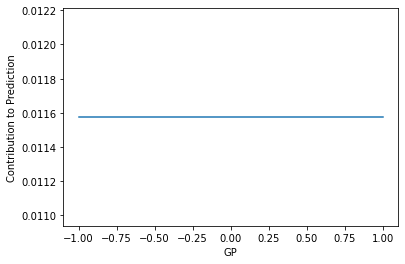

In [226]:
sub_weights = cb.weights[cb.weights>0]
# print(sub_weights)
# print(sub_weights.shape)
for feat in cols:
    loc = 0
    pred_all = []
    for tree in tree_list:
        if ((feat in cols[tree.feature_importances_>0]) & (len(cols[tree.feature_importances_>0]) >= 1 )) :
            x_temp = pd.DataFrame(np.linspace(-1,1,1000),columns = [feat])
#             print(x_temp)
            for i in cols:
                if i != feat:
                    x_temp[i] = 0
            x_temp = x_temp[X.columns]
        
            pred = tree.predict(x_temp)
            pred_all.append(pred*sub_weights[loc])
        
        loc = loc+1
    pred_all = np.sum(pred_all,axis = 0)
    plt.plot(np.linspace(-1,1,1000),pred_all)
    plt.xlabel(feat)
    plt.ylabel('Contribution to Prediction')
    break

<AxesSubplot:xlabel='Feature 2', ylabel='Feature 1'>

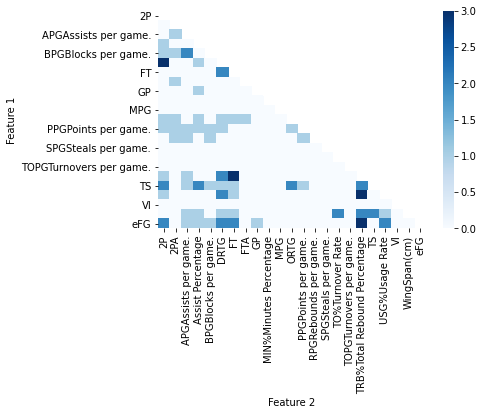

In [198]:
import itertools
import seaborn as sns
from itertools import combinations,permutations
import matplotlib.pyplot as plt



pairs = list(permutations(cols,2))
counter = pd.DataFrame(pairs,columns = ['Feature 1','Feature 2'])

counts = []
for i in pairs:
    n = 0
    for tree in tree_list:
        feats = list(cols[tree.feature_importances_>0])
        if ((i[0] in feats) & (i[1] in feats)):
            n = n + 1
    counts.append(n)
counter['count'] = counts
counter = counter.pivot_table(index='Feature 1', columns='Feature 2', values='count')
mask = np.zeros_like(counter, dtype='bool')
mask[np.triu_indices_from(mask)] = True
sns.heatmap(counter, mask = mask , cmap = 'Blues')

<AxesSubplot:xlabel='WingSpan(cm)', ylabel='eFG'>

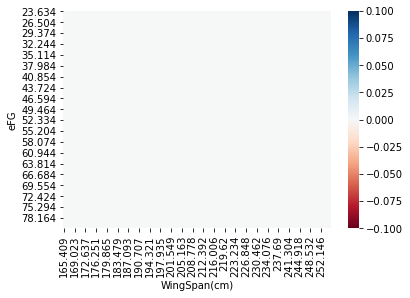

In [125]:
pairs = list(permutations(np.linspace(-3,3,200),2)) 
x_temp = pd.DataFrame(pairs,columns = ['eFG','WingSpan(cm)'])
for i in cols:
    if i not in ['eFG','WingSpan(cm)']:
        x_temp[i] = 0
x_temp = x_temp[X.columns]
pred_all = []
loc = 0
for tree in tree_list:
    if (('eFG' in cols[tree.feature_importances_>0]) &('WingSpan(cm)' in cols[tree.feature_importances_>0]) & (len(cols[tree.feature_importances_>0]) == 2)):
        pred = tree.predict(x_temp)
        pred_all.append(pred*sub_weights[loc])
        
    loc = loc + 1
pred_all = np.sum(pred_all,axis = 0)


df = pd.DataFrame(pairs,columns = ['eFG','WingSpan(cm)'])
df['contribution'] = pred_all

contribution = df['contribution']

#Unscale the data for easier interpretation
temp = df.drop('contribution',axis = 1)
for i in cols:
    if i not in ['eFG','WingSpan(cm)']:
        temp[i] = 0
temp = temp[X.columns]
temp = pd.DataFrame(xTrainScaler.inverse_transform(temp), columns = X.columns)
df = temp[['eFG','WingSpan(cm)']].round(3)
df['contribution'] = contribution.round(3)

df_plot = df.pivot_table(index='eFG', columns='WingSpan(cm)', values='contribution')
sns.heatmap(df_plot , cmap = 'RdBu', fmt='.4f')

109.08537815126049


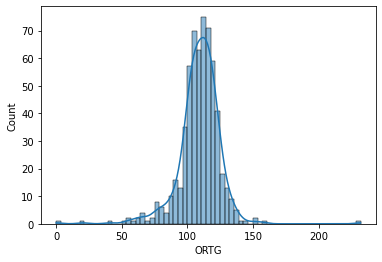

In [10]:
import seaborn 
seaborn.histplot(df['ORTG'],kde = 'True')
print(df['ORTG'].mean())

<AxesSubplot:xlabel='3P', ylabel='Count'>

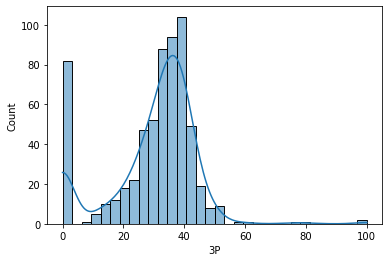

In [11]:
seaborn.histplot(df['3P'],kde = 'True')

<AxesSubplot:xlabel='WingSpan(cm)', ylabel='Count'>

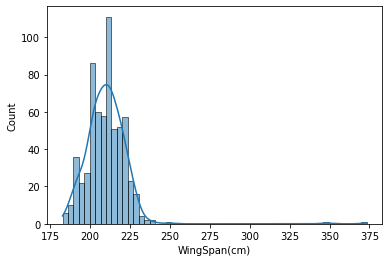

In [12]:
seaborn.histplot(df['WingSpan(cm)'],kde = 'True')

<AxesSubplot:xlabel='PPGPoints per game.', ylabel='Count'>

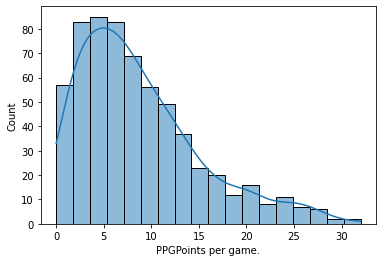

In [13]:
seaborn.histplot(df['PPGPoints per game.'],kde = 'True')

Bagging Classifier

In [242]:
from sklearn.ensemble import BaggingClassifier